In [2]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [3]:
#import 2016 data

csvpath_2016 = os.path.join('Resources', '2016.csv')
csv_2016 = pd.read_csv(csvpath_2016)

In [4]:
# Restructure / Rename
# datasets from 2015 - 2017.
#added region as as column************

# Convert / fix 2016 Data

csv_2016_restructured = csv_2016[["Happiness Rank",
                                 "Country",
                                  "Region",
                                  "Happiness Score",
                                  "Economy (GDP per Capita)",
                                  "Family",
                                  "Health (Life Expectancy)",
                                  "Freedom",
                                  "Generosity",
                                  "Trust (Government Corruption)"]]

csv_2016_restructured = csv_2016_restructured.rename(columns={"Happiness Rank": "Overall rank",
                                      "Country": "Country",
                                      "Region": "Region",                        
                                      "Happiness Score": "Score",
                                      "Economy (GDP per Capita)": "GDP per capita",
                                      "Family": "Social support",
                                      "Health (Life Expectancy)": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust (Government Corruption)": "Perceptions of corruption"})
csv_2016_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,2,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,3,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,4,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,5,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004


In [7]:
#see how many regions there are in dataset
#csv_2015_restructured["Region"].value_counts()
  
# renaming regions in dataset to be able to have less groups for better visualization
#Making "Asia" one large group instead of three
csv_2016_restructured["Region"]= csv_2016_restructured["Region"].replace("Southeastern Asia", "Asia") 
csv_2016_restructured["Region"]= csv_2016_restructured["Region"].replace("Southern Asia", "Asia")
csv_2016_restructured["Region"]= csv_2016_restructured["Region"].replace("Eastern Asia", "Asia")

#making Europe into one group instead of two separate ones
csv_2016_restructured["Region"]= csv_2016_restructured["Region"].replace("Central and Eastern Europe", "Europe")
csv_2016_restructured["Region"]= csv_2016_restructured["Region"].replace("Western Europe", "Europe")

#counting to make sure I did it correctly

csv_2016_restructured["Region"].value_counts()
  

Europe                             50
Sub-Saharan Africa                 38
Latin America and Caribbean        24
Asia                               22
Middle East and Northern Africa    19
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

slope:0.29
intercept:-0.58
R-squared: 0.6246
y=0.29x + -0.58


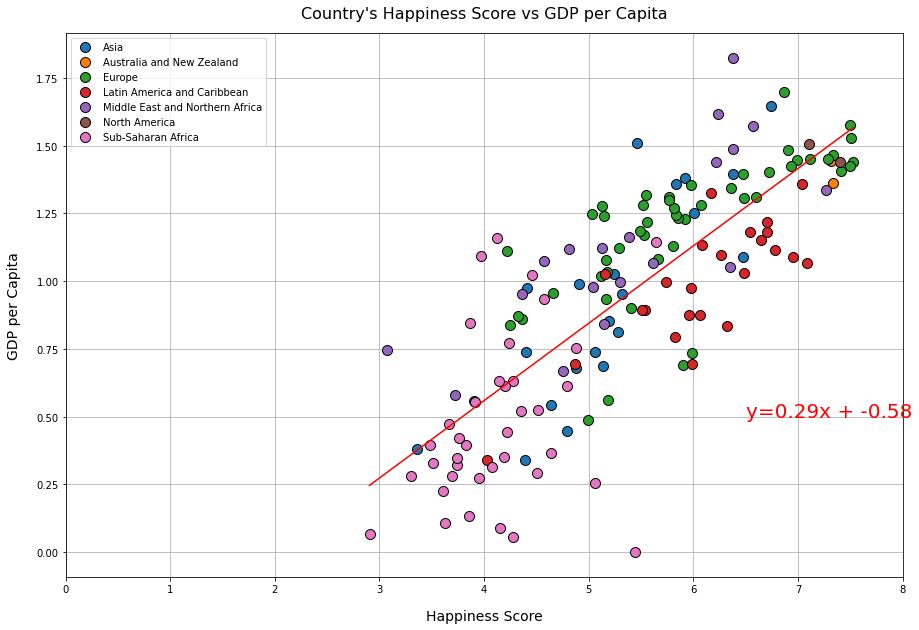

In [20]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["GDP per capita"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.17
intercept:-0.14
R-squared: 0.5465
y=0.17x + -0.14


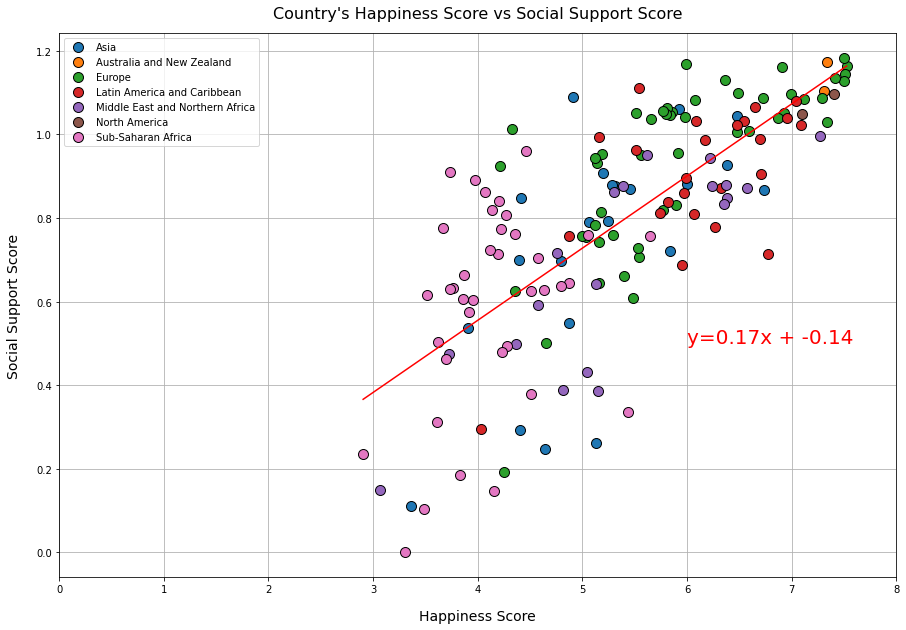

In [21]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["Social support"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.15
intercept:-0.27
R-squared: 0.5858
y=0.15x + -0.27


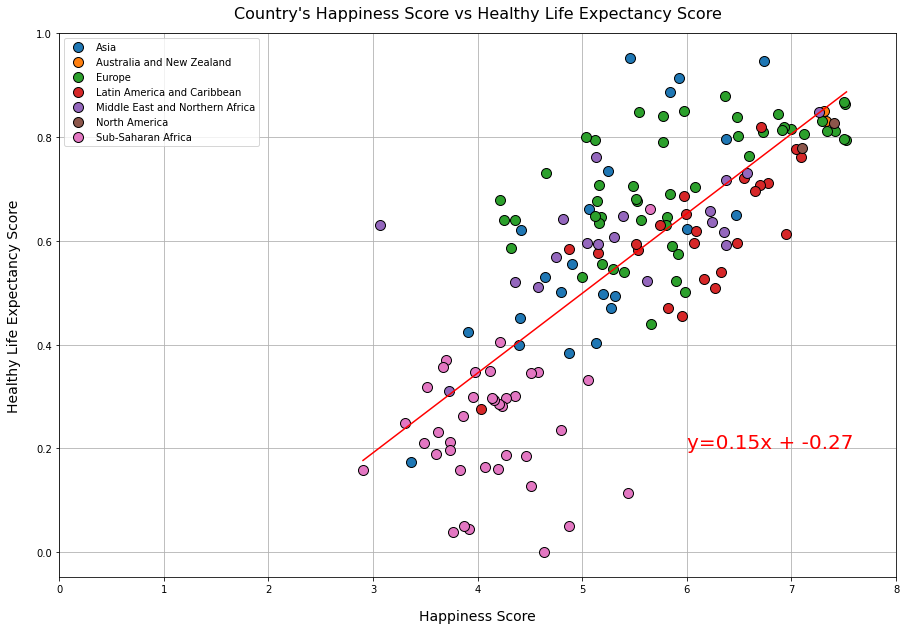

In [22]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["Healthy life expectancy"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.07
intercept:-0.02
y=0.07x + -0.02


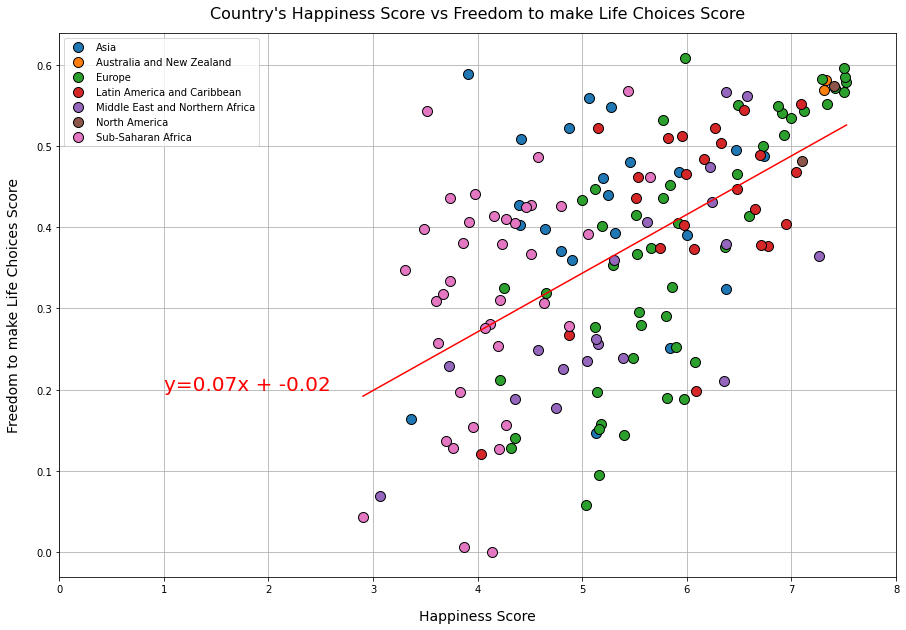

In [15]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["Freedom to make life choices"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1,0.2), fontsize =20, color = "red")
plt.show()

slope:0.02
intercept:0.14
R-squared: 0.0246
y=0.02x + 0.14


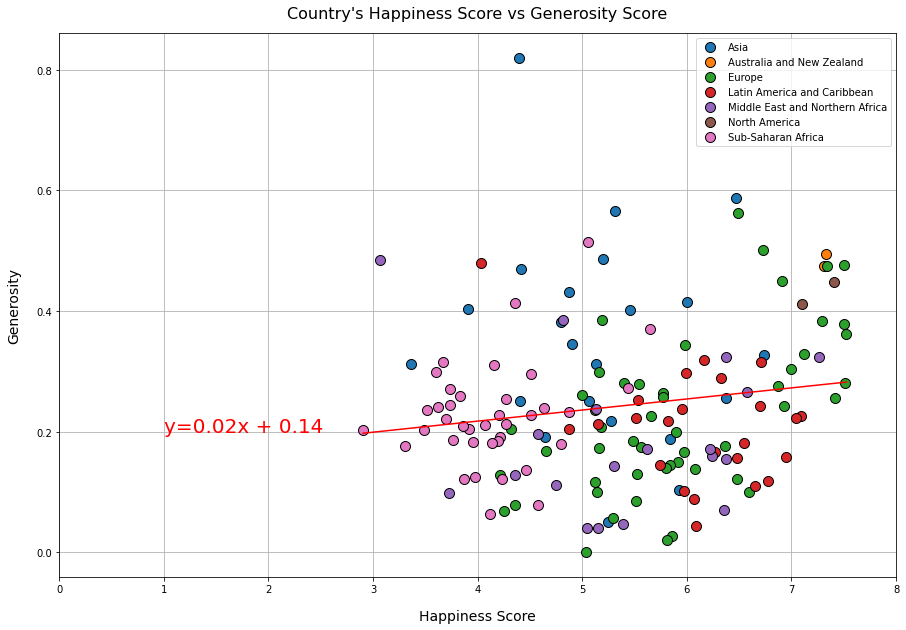

In [23]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["Generosity"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.04
intercept:-0.07
R-squared: 0.1616
y=0.04x + -0.07


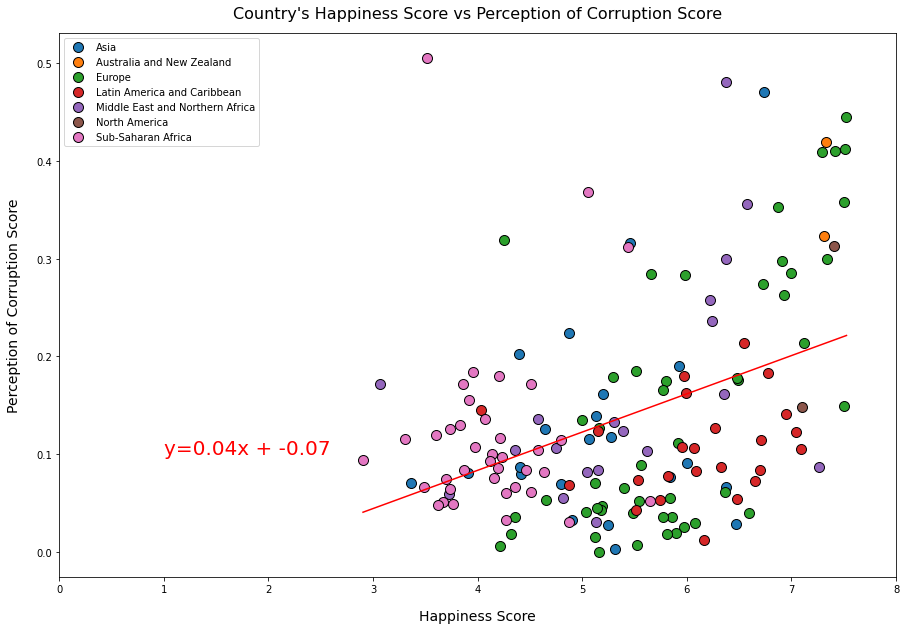

In [24]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = csv_2016_restructured["Score"]
y_values = csv_2016_restructured["Perceptions of corruption"]

#make df with all the vlaues I want to incorporate
country =csv_2016_restructured["Country"]
region = csv_2016_restructured["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.1), fontsize =20, color = "red")
plt.show()